[0.0026713689108029933, 0.0534903601839287, 0.17202981958217722, 0.3507529474190733, 0.5506372181178248, 0.7204348062325997, 0.8361256137998755, 0.9053989780311807, 0.9448823391655036, 0.9673179221896543, 0.9802978788454522]


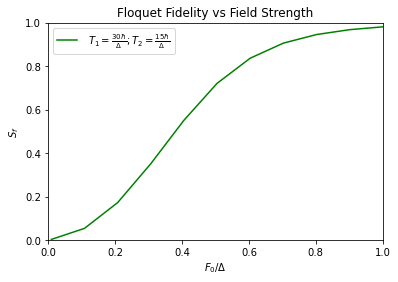

In [12]:

from qutip import *
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig




# Constants
delta =1 
eps0 = 1 * 2 * np.pi
A = 2.5 * 2 * np.pi
omega = delta
T = 2 * np.pi / omega


T1=30/delta #Relaxation time; Adjust this variable to obtain 7.1,7.2,ect
T2=15/delta  #Coherence time; Adjust this variable to obtain 7.1,7.2,ect



gamma1=1/(4*T1)
gamma2=(1/T2-2*gamma1)/2
L1=sigmax()-1j*sigmay()
L2=-1*sigmaz()

#Collapse Operators
C1=np.sqrt(gamma1)*L1
C2=np.sqrt(gamma2)*L2
#Psi,groud state
psi0 = basis(2,1)

Nt=500
dt=T/Nt



n_0= 190*Nt
options=qutip.Options(store_states=True)


times= np.linspace(0, 900, 200*Nt)


t=200/4000



tlist_period=np.linspace(0,T,Nt)

rhoee=[]


A_list= np.linspace(0.01,1,11)
Freq_list=[]
FF_1=[]  
for n,F0 in enumerate(A_list):
    H0=(delta/2)*sigmaz()
    H1=F0*sigmax()
    def H1_tempcoeff(times, args):
        return np.sin(omega*times)
    H_tmp=[H0,[H1,H1_tempcoeff]]
    f_modes0, f_energies = floquet_modes(H_tmp, T)
    fmodes_table=floquet_modes_table(f_modes0,f_energies,tlist_period,H_tmp,T)
    result= mesolve(H_tmp, psi0.proj(), times,[C1,C2],[],options=options) #Modes
    f_mat_list=[] #floquet state lis
    Freq_list.append(A_list[n])
    for i,t in enumerate(times[n_0:n_0+Nt]):  #index 'i' and output 't' 
        f_modes_t = floquet_modes_t_lookup(fmodes_table, t, T) #function allows user to loook up floquet modes, 
        rho=result.states[n_0+i] #
        ee,ev=rho.eigenstates() #Assigning values
        f_mat=np.zeros((2,2)) # 2x2 matrix of 0s
        f_mat[0,0]=abs(ev[0].overlap(f_modes_t[0]))**2 #ask what this is for/what it means
        f_mat[0,1]=abs(ev[0].overlap(f_modes_t[1]))**2
        f_mat[1,0]=abs(ev[1].overlap(f_modes_t[0]))**2
        f_mat[1,1]=abs(ev[1].overlap(f_modes_t[1]))**2
        f_mat_list.append(f_mat)   
    f_mat_array=np.array(f_mat_list)
    Sum=np.sum(f_mat_array,axis=0)/Nt
    floquet_fidelity=np.linalg.det(Sum)
    FF_1.append(floquet_fidelity)
print(FF_1)

fig, ax =plt.subplots()
ax.set_title(r"Floquet Fidelity vs Field Strength")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.plot(Freq_list,FF_1, 'green',label=r' $T_{1}=\frac{ 30 \hbar}{\Delta}; T_{2} =\frac{15 \hbar}{\Delta}$')
ax.set_xlabel('$F_{0}/ \Delta$')
ax.set_ylabel('$S_{f}$')
   
    
ax.legend()    
plt.show()

    
    